In [1]:
# General libraries
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

# Scikit Learn libraries
from sklearn.model_selection import train_test_split

# Utils functions
from utils.utils import compare_models, plot_score_dist, compare_confidence_intervals, five_two, read_datasets

In [2]:
x_train, x_test, y_train, y_test = read_datasets(
    'x_train.csv',
    'x_test.csv',
    'y_train.csv',
    'y_test.csv'
)

In [3]:
def load_model(model):
    models_folder = '../models/'
    return joblib.load(models_folder + model + '_model.joblib')

In [4]:
#1000 to 10.000 did not show significative differences
#size 2270 based on the paper: https://www.econstor.eu/bitstream/10419/67820/1/587473266.pdf
random_state_list = list(np.random.randint(low = 1,high=5000,size=2270))

## Linear Regression VS SVR

In [5]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = 0.003335
Fold  2 score difference = -0.132111
Fold  1 score difference = -0.112742
Fold  2 score difference = -0.129562
Fold  1 score difference = -0.235012
Fold  2 score difference = -0.104680
Fold  1 score difference = -0.029242
Fold  2 score difference = -0.096055
Fold  1 score difference = -0.172113
Fold  2 score difference = -0.105608
Regression 1 mean score and stdev : 0.044218 + 0.075158
Regression 2 mean score and stdev : 0.155597 + 0.047330
Score difference mean + stdev : -0.111379 + 0.063210
t_value for the current test is 0.049986


mean_score_1 0.006835477126856912, std 0.10952160235174356
mean_score_2 0.09343345067431993, std 0.09404535360392763
Ttest_relResult(statistic=-54.08271444169741, pvalue=0.0)
P value menor ou igual a 0.05


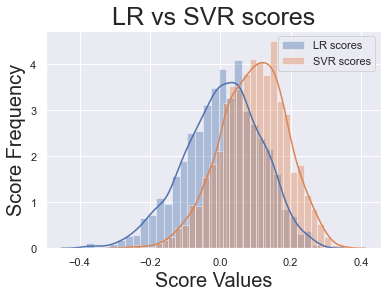

In [6]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

lr_svr_comp_scores = [reg1_scores, reg2_scores, 'LR', 'SVR']


plot_score_dist(reg1_scores, reg2_scores, 'LR', 'SVR')

In [7]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.2216685651497794
0.2032589449526469
-0.1045004361903588
0.2651521323974532


## Linear Regression VS XGBoost

In [8]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

[07:51:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  1 score difference = 0.006751
[07:51:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  2 score difference = -0.182312
[07:51:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have

mean_score_1 0.006835477126856912, std 0.10952160235174356
mean_score_2 0.2560062646875133, std 0.06088154519651864
Ttest_relResult(statistic=-138.88222289171892, pvalue=0.0)
P value menor ou igual a 0.05


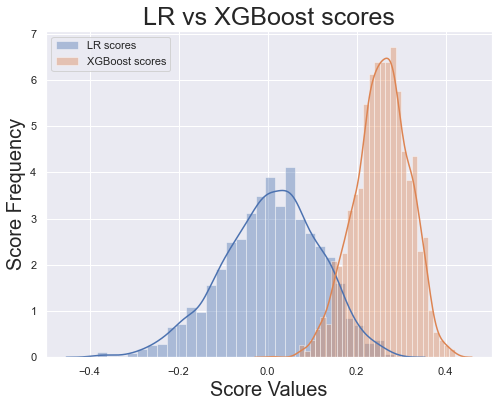

In [9]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)


lr_xgboost_comp_scores = [reg1_scores, reg2_scores, 'LR', 'XGBoost']


plot_score_dist(reg1_scores, reg2_scores, 'LR', 'XGBoost')

In [10]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.2216685651497794
0.2032589449526469
0.12878400176999721
0.3629158762836829


# Linear Regression VS Neural Network

In [11]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('mlpRegressor'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = -0.019857
Fold  2 score difference = -0.124724
Fold  1 score difference = -0.098709
Fold  2 score difference = 0.037725
Fold  1 score difference = -0.181555
Fold  2 score difference = -0.128450
Fold  1 score difference = -0.029345
Fold  2 score difference = -0.006454
Fold  1 score difference = -0.198089
Fold  2 score difference = -0.118044
Regression 1 mean score and stdev : 0.044218 + 0.075158
Regression 2 mean score and stdev : 0.130968 + 0.054468
Score difference mean + stdev : -0.086750 + 0.074430
t_value for the current test is -0.316503


mean_score_1 0.006835477126856912, std 0.10952160235174356
mean_score_2 0.17352322166430828, std 0.06813202291607529
Ttest_relResult(statistic=-97.19456477237678, pvalue=0.0)
P value menor ou igual a 0.05


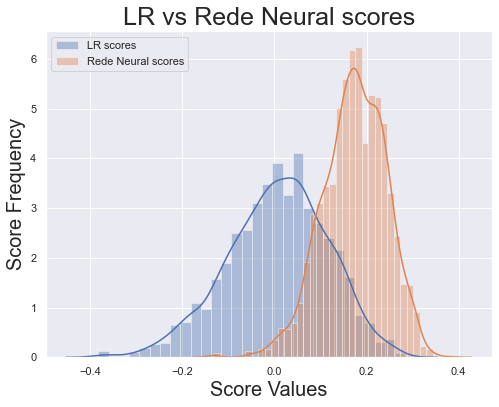

In [12]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('mlpRegressor'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)


lr_nn_comp_scores = [reg1_scores, reg2_scores, 'LR', 'Rede Neural']


plot_score_dist(reg1_scores, reg2_scores, 'LR', 'Rede Neural')

In [13]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.2216685651497794
0.2032589449526469
0.030329661458483426
0.29703992785212746


## SVR VS XGboost

In [14]:
five_two(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

[07:52:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  1 score difference = 0.003417
[07:52:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  2 score difference = -0.050201
[07:52:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have

mean_score_1 0.09343345067431993, std 0.09404535360392763
mean_score_2 0.2560062646875133, std 0.06088154519651864
Ttest_relResult(statistic=-136.38331084789027, pvalue=0.0)
P value menor ou igual a 0.05


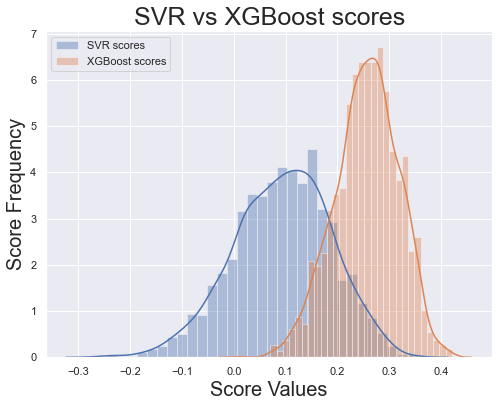

In [15]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)


svr_xgboost_comp_scores = [reg1_scores, reg2_scores, 'SVR', 'XGBoost']


plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'XGBoost')

In [16]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.1045004361903588
0.2651521323974532
0.12878400176999721
0.3629158762836829


# SVR vs Neural Network

In [17]:
five_two(
    reg1=load_model('svr'),
    reg2=load_model('mlpRegressor'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = -0.023814
Fold  2 score difference = -0.005933
Fold  1 score difference = 0.014127
Fold  2 score difference = -0.025227
Fold  1 score difference = 0.035525
Fold  2 score difference = -0.016130
Fold  1 score difference = -0.003676
Fold  2 score difference = 0.020264
Fold  1 score difference = -0.027316
Fold  2 score difference = -0.010401
Regression 1 mean score and stdev : 0.155597 + 0.047330
Regression 2 mean score and stdev : 0.159855 + 0.049871
Score difference mean + stdev : -0.004258 + 0.020144
t_value for the current test is -1.025188


mean_score_1 0.09343345067431993, std 0.09404535360392763
mean_score_2 0.17352322166430828, std 0.06813202291607529
Ttest_relResult(statistic=-81.04931440595267, pvalue=0.0)
P value menor ou igual a 0.05


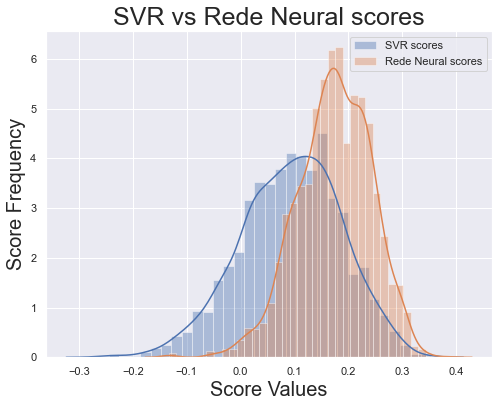

In [18]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('mlpRegressor'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

svr_nn_comp_scores = [reg1_scores, reg2_scores, 'SVR', 'Rede Neural']


plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'Rede Neural')

In [19]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.1045004361903588
0.2651521323974532
0.030329661458483426
0.29703992785212746


# XGBoost vs Neural Network

In [20]:
five_two(
    reg1=load_model('xgboost'),
    reg2=load_model('mlpRegressor'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

[07:53:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  1 score difference = -0.022812
[07:53:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  2 score difference = 0.046130
[07:53:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have

mean_score_1 0.2560062646875133, std 0.06088154519651864
mean_score_2 0.17352322166430828, std 0.06813202291607529
Ttest_relResult(statistic=100.91329906904842, pvalue=0.0)
P value menor ou igual a 0.05


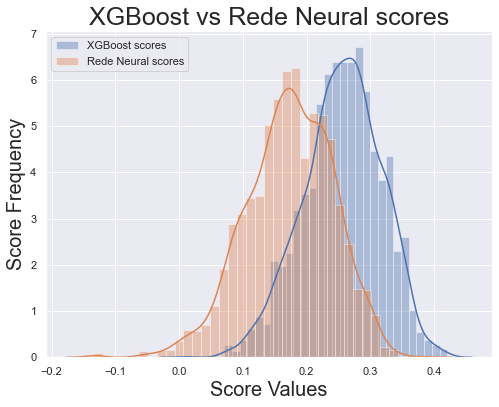

In [21]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('xgboost'),
    reg2=load_model('mlpRegressor'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

xgboost_nn_comp_scores = [reg1_scores, reg2_scores, 'XGBoost', 'Rede Neural']


plot_score_dist(reg1_scores, reg2_scores, 'XGBoost', 'Rede Neural')

In [22]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

0.12878400176999721
0.3629158762836829
0.030329661458483426
0.29703992785212746


# Use Subplots to plot

In [23]:
from utils.utils import plot_all_compares

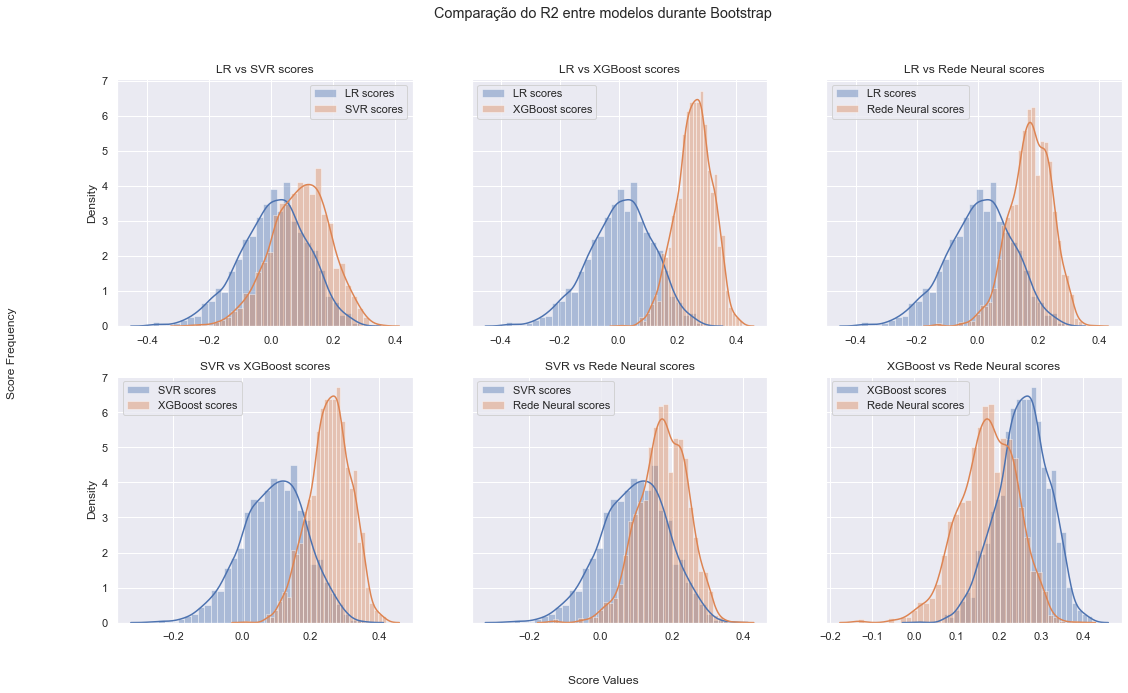

In [24]:
plot_all_compares(
    lr_svr_comp_scores,
    lr_xgboost_comp_scores,
    lr_nn_comp_scores,
    svr_xgboost_comp_scores,
    svr_nn_comp_scores,
    xgboost_nn_comp_scores
)